In [2]:
#Importing all the libraries
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [3]:
#Changing working directory & reading the dataset
cd C:\DATA SCIENCE\Projects
df=pd.read_csv('University_Admission.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
# mostly used statistical measure of numerical columns
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [6]:
#Dropping unusefull column.
df=df.drop(['Serial No.'],axis=1)

In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

No Null values, thats cool.

In [8]:
#Info of all the column including data types & non-null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


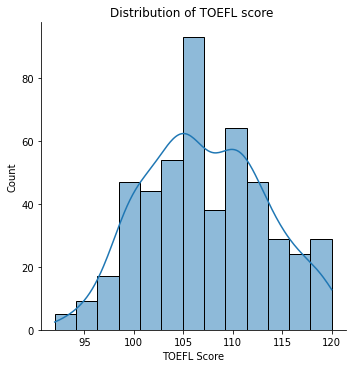

In [9]:
# Kernel Distribution Estimation(KDE) plot is like probability density function of the continuous values
fig=sns.displot(df['TOEFL Score'],kde=True)
plt.title('Distribution of TOEFL score ')
plt.show()

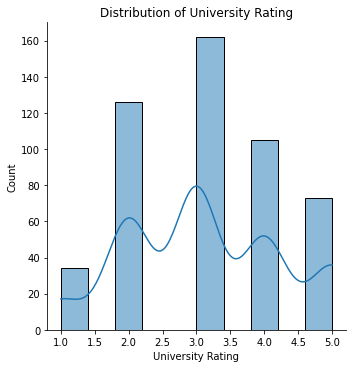

In [10]:
fig=sns.displot(df['University Rating'],kde= True)
plt.title('Distribution of University Rating')
plt.show()

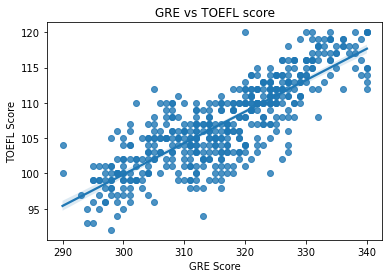

In [11]:
#.regplot shows if linear combination exists
fig=sns.regplot(x="GRE Score",y="TOEFL Score",data=df)
plt.title('GRE vs TOEFL score')
plt.show()

In [12]:
# Corrleation coffiecient matrix for all variable
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


In [14]:
df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

Text(0.5, 1.0, 'Correlation Factors Heatmap')

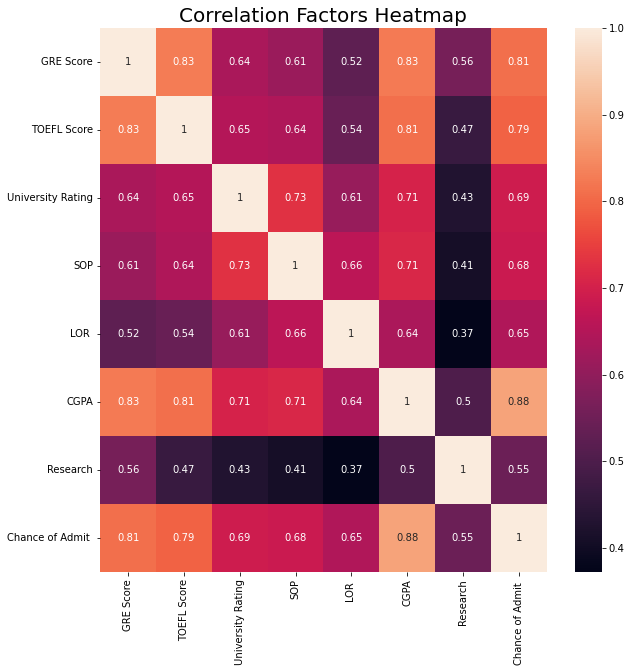

In [15]:
#heatmap using correlation coffiecint of all variables
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True).set_title('Correlation Factors Heatmap',color='black',size='20')

In [16]:
# Importing sklearn for train & test split
from sklearn.model_selection import train_test_split

In [17]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [18]:
# separting training & test columns
x=df.drop(['Chance of Admit '],axis=1)
y=df['Chance of Admit ']

In [19]:
# Assigning train,test varaibles & their percentage of data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,shuffle=True,random_state=22)

In [21]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
94,303,99,3,2.0,2.5,7.66,0
350,318,107,3,3.0,3.5,8.27,1
288,314,104,4,5.0,5.0,9.02,0
420,299,100,3,2.0,3.0,7.42,0
163,317,105,3,3.5,3.0,8.56,0
...,...,...,...,...,...,...,...
356,327,109,3,3.5,4.0,8.77,1
448,312,109,2,2.5,4.0,9.02,0
300,309,106,2,2.5,2.5,8.00,0
132,309,105,5,3.5,3.5,8.56,0


In [22]:
# 'add_constant'it takes care of the bias in the data (a constant difference which is there for all observations). 
x_train=sm.add_constant(x_train)

In [23]:
x_train

,const,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
94,1.0,303,99,3,2.0,2.5,7.66,0
350,1.0,318,107,3,3.0,3.5,8.27,1
288,1.0,314,104,4,5.0,5.0,9.02,0
420,1.0,299,100,3,2.0,3.0,7.42,0
163,1.0,317,105,3,3.5,3.0,8.56,0
...,...,...,...,...,...,...,...,...
356,1.0,327,109,3,3.5,4.0,8.77,1
448,1.0,312,109,2,2.5,4.0,9.02,0
300,1.0,309,106,2,2.5,2.5,8.00,0
132,1.0,309,105,5,3.5,3.5,8.56,0


In [24]:
# Fit a linear regression model using Ordinary Least Square
model=sm.OLS(y_train,x_train).fit()

In [33]:
model

In [26]:
# Showing for every variable, how much intercept we are getting.
model.params

const               -1.258623
GRE Score            0.001723
TOEFL Score          0.003218
University Rating    0.007148
SOP                  0.000522
LOR                  0.013378
CGPA                 0.117301
Research             0.026248
dtype: float64

In [27]:
# Printing all summary of model 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     242.2
Date:                Mon, 07 Nov 2022   Prob (F-statistic):          4.23e-138
Time:                        23:06:50   Log-Likelihood:                 556.21
No. Observations:                 400   AIC:                            -1096.
Df Residuals:                     392   BIC:                            -1064.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2586      0.11

In [28]:

# Now checking VIF score for every variable - it tells how much each independent varible is usefull
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataset):
    vif=pd.DataFrame()
    vif['features']=dataset.columns
    vif['VIF_Value']=[variance_inflation_factor(dataset.values,i) for i in range(dataset.shape[1])]
    return vif

In [29]:
vif_df=calculate_vif(x_train)
vif_df

,features,VIF_Value
0,const,1433.621529
1,GRE Score,4.303043
2,TOEFL Score,4.007413
3,University Rating,2.542555
4,SOP,2.790534
5,LOR,1.947600
6,CGPA,4.506881
7,Research,1.493766


VIF score for 'GRE Score is a bit high.let's drop this & then check VIF score.

In [30]:
x_train_iter=x_train.drop(['GRE Score'],axis=1)
x_test_iter=x_test.drop(['GRE Score'],axis=1)
calculate_vif(x_train_iter)

,features,VIF_Value
0,const,560.505480
1,TOEFL Score,3.023047
2,University Rating,2.538822
3,SOP,2.786448
4,LOR,1.937282
5,CGPA,3.905926
6,Research,1.375741


Now for evry othetr varible also VIF score came close to 1, which is good.